In [1]:
# Avoiding ValueError: ('range parameter must be finite.', u'occurred at index 6.0')
# The newer version of numpy throws an error when I try to run vanhove 
# (or any histogram function) on data with NaN.

## conda install numpy=1.10.4
## conda install -c soft-matter trackpy=0.3.0

import pkg_resources
pkg_resources.require("numpy==1.10.4")
#pkg_resources.require("trackpy==0.3.0")
import numpy as np
import trackpy as tp

print(np.__version__)
print(tp.__version__)

1.10.4
0.3.2


In [2]:
%matplotlib inline

# Import all the programs we want to use. If this gives an error, then you need to add these to your python path.

import matplotlib as mpl
import matplotlib.pyplot as plt

#import numpy as np 
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
#import holopy as hp
import os
#import av
import scipy
import scipy.optimize as sco
import seaborn

%pylab inline 
# tell python how to display images

#%matplotlib notebook

#tp.__version__

Populating the interactive namespace from numpy and matplotlib


In [3]:
scaling =  0.08431 #um/pixel
moviename = "manualnorm,tracer+janus_3%_H2O2_5,2016-06-14"

In [4]:
os.chdir("\\\\manoharanfs1.rc.fas.harvard.edu\\manoharanfs1\\zchambers\\analysis\\2016-06-14\\tracer+Janus_no_H2O2_3_emulsion_red_2016-06-14")
tmnr = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_no_H2O2_3(red)2016-06-14_pickled.pkl')
#read pickle file for tracer particles with no H2O2
tmnr.head()

,x,y,relative_to_frame,x_raw,y_raw,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,,,,
1,744.858008,187.833726,0,745.742332,187.386285,1975.140715,4.535922,0.078821,18.500549,14666.0,0.196589,1,6.0
1,835.000497,244.693252,0,835.813472,244.358768,4784.462906,4.315031,0.042065,51.359733,20485.0,0.049644,1,10.0
1,655.168774,280.363652,0,655.937174,279.803706,2132.533446,4.606671,0.045663,18.776677,17456.0,0.081262,1,13.0
1,481.254002,283.792025,0,482.018241,283.014059,6354.800560,4.326305,0.020272,69.308027,19705.0,0.055172,1,14.0
1,836.799348,282.900444,0,837.564426,282.568185,1356.614893,4.508445,0.044149,12.425742,17404.0,0.082161,1,15.0


In [5]:
os.chdir("\\\\manoharanfs1.rc.fas.harvard.edu\\manoharanfs1\\zchambers\\analysis\\2016-06-14\\tracer+Janus_no_H2O2_3_emulsion_green_2016-06-14")
tmng = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_no_H2O2_3(green)2016-06-14_pickled.pkl')
#read pickle file for janus particles with no H2O2
tmng.head()

,x,y,relative_to_frame,x_raw,y_raw,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,,,,
1,875.160878,192.028652,0,874.697693,191.754771,3968.798645,4.464910,0.027739,37.269016,11861.0,0.079888,1,4.0
1,835.597617,244.699832,0,835.206839,244.480260,1849.738631,4.366219,0.019074,18.986103,9252.0,0.169469,1,5.0
1,481.856246,283.222511,0,481.518730,283.488932,2529.370788,4.271017,0.022451,25.666398,8377.0,0.271613,1,9.0
1,567.957162,295.440481,0,567.636351,295.588590,2328.258737,4.227951,0.009058,26.369587,9071.0,0.183764,1,10.0
1,954.420411,303.649093,0,954.110514,303.266207,2240.711709,4.543183,0.031326,20.744075,10623.0,0.106635,1,11.0


In [6]:
os.chdir("\\\\manoharanfs1.rc.fas.harvard.edu\\manoharanfs1\\zchambers\\analysis\\2016-06-14\\tracer+Janus_3%_H2O2_5_emulsion_red_2016-06-14")
tmhr = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_3%_H2O2_5(red)2016-06-14_pickled.pkl')
#read pickle file for tracer particles with 3% H2O2
tmhr.head()

,x,y_raw,y,z,ecc,ep,frame,mass,particle,raw_mass,relative_to_frame,signal,size,x_raw
frame,,,,,,,,,,,,,,
1,530.057339,140.293532,140.711503,NaN,0.070215,0.086047,1,1887.428114,3.0,17782.0,0,19.877175,4.359759,529.171947
1,328.617370,169.248742,169.304398,NaN,0.008545,0.160289,1,1613.665204,7.0,15211.0,0,14.154958,4.660016,327.783738
1,498.203252,194.765398,195.126156,NaN,0.004530,0.145185,1,1311.592379,9.0,15521.0,0,12.347942,4.505208,497.415796
1,618.819631,196.792222,197.369956,NaN,0.026828,0.083724,1,4723.539579,10.0,17936.0,0,46.681244,4.484835,618.036016
1,333.432486,212.899372,212.963760,NaN,0.027060,0.053463,1,6864.552259,11.0,21165.0,0,72.581806,4.324035,332.677383


In [7]:
os.chdir("\\\\manoharanfs1.rc.fas.harvard.edu\\manoharanfs1\\zchambers\\analysis\\2016-06-14\\tracer+Janus_3%_H2O2_5_emulsion_green_2016-06-14")
tmhg = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_3%_H2O2_5(green)2016-06-14_pickled.pkl')
#read pickle file for janus particles with 3% H2O2
tmhg.head()

,x,y,relative_to_frame,x_raw,y_raw,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,,,,
1,334.271179,212.315119,0,332.555782,212.905931,2400.095318,4.244409,0.022435,26.408594,9782.0,0.113745,1,12.0
1,673.982923,253.024125,0,672.318464,253.187598,3871.088289,4.323736,0.037196,41.842188,11701.0,0.067698,1,16.0
1,461.220389,329.668033,0,459.652504,330.099069,5590.047668,4.382587,0.005051,56.246875,16907.0,0.032264,1,21.0
1,108.901070,344.408378,0,107.352006,345.282568,2439.536724,4.300599,0.051282,27.780469,8240.0,0.250852,1,24.0
1,67.245335,500.488073,0,65.892629,501.414536,2054.725786,4.132527,0.037877,26.408594,8049.0,0.294879,1,43.0


In [8]:
posnrx = tmnr.set_index(['frame','particle'])['x'].unstack()
# This function takes the x position of the particle and arranges it by frame
posnrx.head()

particle,6.0,10.0,13.0,14.0,15.0,16.0,18.0,30.0,35.0,42.0,...,6259.0,6263.0,6266.0,6298.0,6309.0,6310.0,6322.0,6325.0,6335.0,6339.0
frame,,,,,,,,,,,,,,,,,,,,,
1,744.858008,835.000497,655.168774,481.254002,836.799348,567.377065,952.544770,730.190415,922.357266,519.191099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,745.296957,832.819764,656.539411,485.184739,836.312254,564.106718,952.108524,729.156278,927.411473,513.936827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,745.588228,829.519608,658.602735,482.980364,834.381484,561.505980,954.711192,729.473823,929.874226,512.302353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,743.764997,830.799984,657.075067,483.944434,834.857322,560.790611,NaN,724.618308,933.067305,513.722209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,741.746743,831.948938,663.064644,482.904965,835.331049,559.813810,953.868770,719.187954,933.913744,509.103509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
poshrx = tmhr.set_index(['frame','particle'])['x'].unstack()
# This function takes the x position of the particle and arranges it by frame

In [10]:
posngx = tmng.set_index(['frame','particle'])['x'].unstack()
# This function takes the x position of the particle and arranges it by frame

In [11]:
poshgx = tmhg.set_index(['frame','particle'])['x'].unstack()
# This function takes the x position of the particle and arranges it by frame

In [12]:
posnry = tmnr.set_index(['frame','particle'])['y'].unstack()
# This function takes the y position of the particle and arranges it by frame

In [13]:
poshry = tmhr.set_index(['frame','particle'])['y'].unstack()
# This function takes the y position of the particle and arranges it by frame

In [14]:
posngy = tmng.set_index(['frame','particle'])['y'].unstack()
# This function takes the y position of the particle and arranges it by frame

In [15]:
poshgy = tmhg.set_index(['frame','particle'])['y'].unstack()
# This function takes the x position of the particle and arranges it by frame

In [16]:
binwidth = 0.05
binsequence=arange(-10,10,binwidth)

In [17]:
vh1nrx = tp.motion.vanhove(posnrx, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1ngx = tp.motion.vanhove(posngx, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1nry = tp.motion.vanhove(posnry, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1ngy = tp.motion.vanhove(posngy, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1hrx = tp.motion.vanhove(poshrx, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1hgx = tp.motion.vanhove(poshgx, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1hry = tp.motion.vanhove(poshry, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)
vh1hgy = tp.motion.vanhove(poshgy, lagtime = 6, mpp = scaling,bins = binsequence, ensemble = True)

#This makes array for the van hove correlation function for a lagtime of half a second

C:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\function_base.py:286: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


In [18]:
def manualnorm(histdata):
    return (1/(histdata.sum()*binwidth))*histdata

In [19]:
## Normalize all

vh1nrx = manualnorm(vh1nrx)
vh1nrx = manualnorm(vh1nrx)
vh1ngx = manualnorm(vh1ngx)
vh1nry = manualnorm(vh1nry)
vh1ngy = manualnorm(vh1ngy)
vh1hrx = manualnorm(vh1hrx)
vh1hgx = manualnorm(vh1hgx)
vh1hry = manualnorm(vh1hry)
vh1hgy = manualnorm(vh1hgy)

In [20]:
vh2nrx = manualnorm(tp.motion.vanhove(posnrx, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2ngx = manualnorm(tp.motion.vanhove(posngx, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2nry = manualnorm(tp.motion.vanhove(posnry, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2ngy = manualnorm(tp.motion.vanhove(posngy, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2hrx = manualnorm(tp.motion.vanhove(poshrx, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2hgx = manualnorm(tp.motion.vanhove(poshgx, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2hry = manualnorm(tp.motion.vanhove(poshry, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))
vh2hgy = manualnorm(tp.motion.vanhove(poshgy, lagtime = 12, mpp = scaling,bins = binsequence, ensemble = True))

#This makes array for the van hove correlation function for a lagtime of 1 second

In [21]:
vh3nrx = manualnorm(tp.motion.vanhove(posnrx, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3ngx = manualnorm(tp.motion.vanhove(posngx, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3nry = manualnorm(tp.motion.vanhove(posnry, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3ngy = manualnorm(tp.motion.vanhove(posngy, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3hrx = manualnorm(tp.motion.vanhove(poshrx, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3hgx = manualnorm(tp.motion.vanhove(poshgx, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3hry = manualnorm(tp.motion.vanhove(poshry, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))
vh3hgy = manualnorm(tp.motion.vanhove(poshgy, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = True))

#This makes array for the van hove correlation function for a lagtime of 2 seconds

In [22]:
vh4nrx = manualnorm(tp.motion.vanhove(posnrx, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4ngx = manualnorm(tp.motion.vanhove(posngx, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4nry = manualnorm(tp.motion.vanhove(posnry, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4ngy = manualnorm(tp.motion.vanhove(posngy, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4hrx = manualnorm(tp.motion.vanhove(poshrx, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4hgx = manualnorm(tp.motion.vanhove(poshgx, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4hry = manualnorm(tp.motion.vanhove(poshry, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))
vh4hgy = manualnorm(tp.motion.vanhove(poshgy, lagtime = 48, mpp = scaling,bins = binsequence, ensemble = True))

#This makes array for the van hove correlation function for a lagtime of 4 seconds

In [23]:
vh5nrx = manualnorm(tp.motion.vanhove(posnrx, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5ngx = manualnorm(tp.motion.vanhove(posngx, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5nry = manualnorm(tp.motion.vanhove(posnry, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5ngy = manualnorm(tp.motion.vanhove(posngy, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5hrx = manualnorm(tp.motion.vanhove(poshrx, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5hgx = manualnorm(tp.motion.vanhove(poshgx, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5hry = manualnorm(tp.motion.vanhove(poshry, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))
vh5hgy = manualnorm(tp.motion.vanhove(poshgy, lagtime = 96, mpp = scaling,bins = binsequence, ensemble = True))

#This makes array for the van hove correlation function for a lagtime of 8 seconds

In [24]:
vh6nrx = manualnorm(tp.motion.vanhove(posnrx, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6ngx = manualnorm(tp.motion.vanhove(posngx, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6nry = manualnorm(tp.motion.vanhove(posnry, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6ngy = manualnorm(tp.motion.vanhove(posngy, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6hrx = manualnorm(tp.motion.vanhove(poshrx, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6hgx = manualnorm(tp.motion.vanhove(poshgx, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6hry = manualnorm(tp.motion.vanhove(poshry, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))
vh6hgy = manualnorm(tp.motion.vanhove(poshgy, lagtime = 192, mpp = scaling,bins = binsequence, ensemble = True))

#This makes array for the van hove correlation function for a lagtime of 16 seconds

In [25]:
import math
def gaussian(x,a,b,c):
    return a*(exp(-((x-b)**2)/(2*(c**2))))

def vanhove_and_fit(pos, lagtime, mpp=scaling, bins=100, ensemble=True, fit_function=gaussian):
    vh = tp.motion.vanhove(pos, lagtime, mpp ,bins, ensemble)
    params,covm = sco.curve_fit(fit_function,vh.index, vh.get_values())
    yfit = fit_function(vh.index, params[0],params[1],params[2])

    return (vh, params, covm, yfit)

vh1nrx_try, params1nrx_try, covm1nrx_try, yfit1nrx_try = vanhove_and_fit(posnrx, lagtime = 6)



(-4, 4)

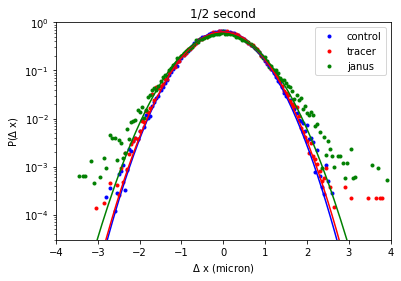

In [26]:
paramsc1,covmc1 = sco.curve_fit(gaussian,vh1nrx.index,vh1nrx.get_values())
yfitc1 = gaussian(vh1nrx.index,paramsc1[0],paramsc1[1],paramsc1[2])

paramst1,covmt1 = sco.curve_fit(gaussian,vh1hrx.index,vh1hrx.get_values())
yfitt1 = gaussian(vh1hrx.index,paramst1[0],paramst1[1],paramst1[2])

paramsj1,covmj1 = sco.curve_fit(gaussian,vh1hgx.index,vh1hgx.get_values())
yfitj1 = gaussian(vh1hgx.index,paramsj1[0],paramsj1[1],paramsj1[2])


vh1nrx.plot(style = 'b.',label = 'control')
vh1hrx.plot(style = 'r.',label = 'tracer')
vh1hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh1nrx.index,yfitc1,color='b')
plt.plot(vh1hrx.index,yfitt1,color='r')
plt.plot(vh1hgx.index,yfitj1,color='g')
plt.yscale('log')
plt.title('1/2 second')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')


ylim(ymin=0.00003, ymax=1)
xlim(-4,4)

(3e-05, 1)

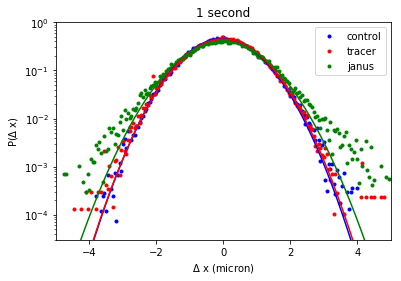

In [27]:
paramsc2,covmc2 = sco.curve_fit(gaussian,vh2nrx.index,vh2nrx.get_values())
yfitc2 = gaussian(vh2nrx.index,paramsc2[0],paramsc2[1],paramsc2[2])

paramst2,covmt2 = sco.curve_fit(gaussian,vh2hrx.index,vh2hrx.get_values())
yfitt2 = gaussian(vh2hrx.index,paramst2[0],paramst2[1],paramst2[2])

paramsj2,covmj2 = sco.curve_fit(gaussian,vh2hgx.index,vh2hgx.get_values())
yfitj2 = gaussian(vh2hgx.index,paramsj2[0],paramsj2[1],paramsj2[2])


vh2nrx.plot(style = 'b.',label = 'control')
vh2hrx.plot(style = 'r.',label = 'tracer')
vh2hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh2nrx.index,yfitc2,color='b')
plt.plot(vh2hrx.index,yfitt2,color='r')
plt.plot(vh2hgx.index,yfitj2,color='g')
plt.yscale('log')
plt.title('1 second')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')
plt.xlim([-5,5])
ylim(ymin=3e-5, ymax=1)

(3e-05, 1)

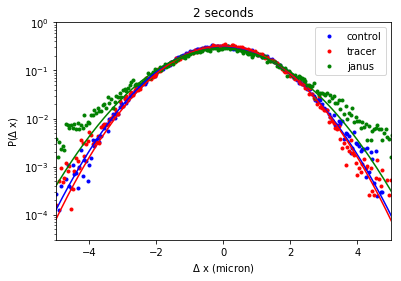

In [28]:
paramsc3,covmc3 = sco.curve_fit(gaussian,vh3nrx.index,vh3nrx.get_values())
yfitc3 = gaussian(vh3nrx.index,paramsc3[0],paramsc3[1],paramsc3[2])

paramst3,covmt3 = sco.curve_fit(gaussian,vh3hrx.index,vh3hrx.get_values())
yfitt3 = gaussian(vh3hrx.index,paramst3[0],paramst3[1],paramst3[2])

paramsj3,covmj3 = sco.curve_fit(gaussian,vh3hgx.index,vh3hgx.get_values())
yfitj3 = gaussian(vh3hgx.index,paramsj3[0],paramsj3[1],paramsj3[2])


vh3nrx.plot(style = 'b.',label = 'control')
vh3hrx.plot(style = 'r.',label = 'tracer')
vh3hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh3nrx.index,yfitc3,color='b')
plt.plot(vh3hrx.index,yfitt3,color='r')
plt.plot(vh3hgx.index,yfitj3,color='g')
plt.yscale('log')
plt.title('2 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')
plt.xlim([-5,5])

ylim(ymin=3e-5, ymax=1)

(3e-05, 1)

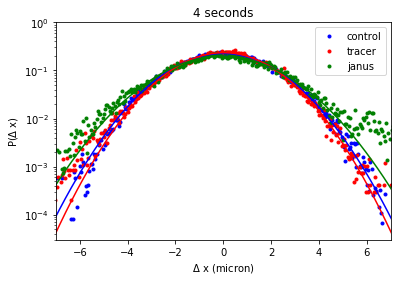

In [29]:
paramsc4,covmc4 = sco.curve_fit(gaussian,vh4nrx.index,vh4nrx.get_values())
yfitc4 = gaussian(vh4nrx.index,paramsc4[0],paramsc4[1],paramsc4[2])

paramst4,covmt4 = sco.curve_fit(gaussian,vh4hrx.index,vh4hrx.get_values())
yfitt4 = gaussian(vh4hrx.index,paramst4[0],paramst4[1],paramst4[2])

paramsj4,covmj4 = sco.curve_fit(gaussian,vh4hgx.index,vh4hgx.get_values())
yfitj4 = gaussian(vh4hgx.index,paramsj4[0],paramsj4[1],paramsj4[2])


vh4nrx.plot(style = 'b.',label = 'control')
vh4hrx.plot(style = 'r.',label = 'tracer')
vh4hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh4nrx.index,yfitc4,color='b')
plt.plot(vh4hrx.index,yfitt4,color='r')
plt.plot(vh4hgx.index,yfitj4,color='g')
plt.yscale('log')
plt.title('4 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')
plt.xlim([-7,7])
ylim(ymin=3e-5, ymax=1)

(-7.5, 7.5)

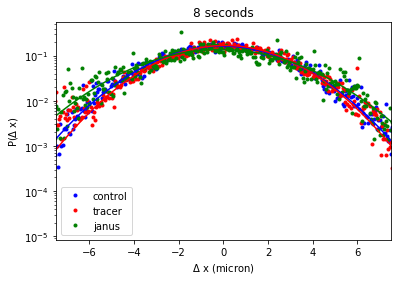

In [30]:
paramsc5,covmc5 = sco.curve_fit(gaussian,vh5nrx.index,vh5nrx.get_values())
yfitc5 = gaussian(vh5nrx.index,paramsc5[0],paramsc5[1],paramsc5[2])

paramst5,covmt5 = sco.curve_fit(gaussian,vh5hrx.index,vh5hrx.get_values())
yfitt5 = gaussian(vh5hrx.index,paramst5[0],paramst5[1],paramst5[2])

paramsj5,covmj5 = sco.curve_fit(gaussian,vh5hgx.index,vh5hgx.get_values())
yfitj5 = gaussian(vh5hgx.index,paramsj5[0],paramsj5[1],paramsj5[2])


vh5nrx.plot(style = 'b.',label = 'control')
vh5hrx.plot(style = 'r.',label = 'tracer')
vh5hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh5nrx.index,yfitc5,color='b')
plt.plot(vh5hrx.index,yfitt5,color='r')
plt.plot(vh5hgx.index,yfitj5,color='g')
plt.yscale('log')
plt.title('8 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')
plt.xlim([-10,10])
#ylim(ymin=3e-5, ymax=1)
xlim(-7.5,7.5)

Text(0.5,0,u'$\\Delta$ x (micron)')

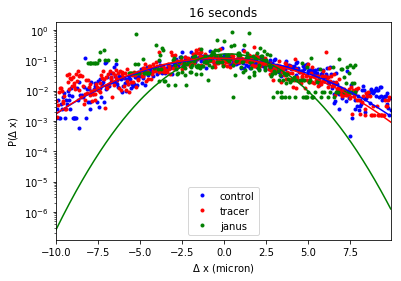

In [31]:
paramsc6,covmc6 = sco.curve_fit(gaussian,vh6nrx.index,vh6nrx.get_values())
yfitc6 = gaussian(vh6nrx.index,paramsc6[0],paramsc6[1],paramsc6[2])

paramst6,covmt6 = sco.curve_fit(gaussian,vh6hrx.index,vh6hrx.get_values())
yfitt6 = gaussian(vh6hrx.index,paramst6[0],paramst6[1],paramst6[2])

paramsj6,covmj6 = sco.curve_fit(gaussian,vh6hgx.index,vh6hgx.get_values())
yfitj6 = gaussian(vh5hgx.index,paramsj6[0],paramsj6[1],paramsj6[2])


vh6nrx.plot(style = 'b.',label = 'control')
vh6hrx.plot(style = 'r.',label = 'tracer')
vh6hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh6nrx.index,yfitc6,color='b')
plt.plot(vh6hrx.index,yfitt6,color='r')
plt.plot(vh6hgx.index,yfitj6,color='g')
plt.yscale('log')
plt.title('16 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')

(-3, 3)

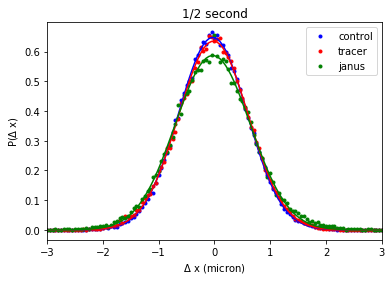

In [32]:
paramsc1,covmc1 = sco.curve_fit(gaussian,vh1nrx.index,vh1nrx.get_values())
yfitc1 = gaussian(vh1nrx.index,paramsc1[0],paramsc1[1],paramsc1[2])

paramst1,covmt1 = sco.curve_fit(gaussian,vh1hrx.index,vh1hrx.get_values())
yfitt1 = gaussian(vh1hrx.index,paramst1[0],paramst1[1],paramst1[2])

paramsj1,covmj1 = sco.curve_fit(gaussian,vh1hgx.index,vh1hgx.get_values())
yfitj1 = gaussian(vh1hgx.index,paramsj1[0],paramsj1[1],paramsj1[2])


vh1nrx.plot(style = 'b.',label = 'control')
vh1hrx.plot(style = 'r.',label = 'tracer')
vh1hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh1nrx.index,yfitc1,color='blue')
plt.plot(vh1hrx.index,yfitt1,color='red')
plt.plot(vh1hgx.index,yfitj1,color='green')
plt.yscale('linear')
plt.title('1/2 second')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')
xlim(-3,3)

(-3, 3)

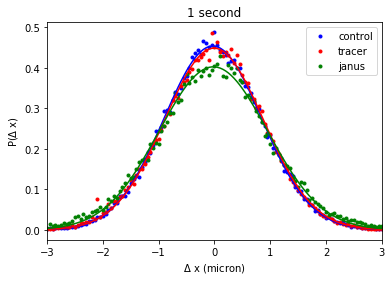

In [33]:
paramsc2,covmc2 = sco.curve_fit(gaussian,vh2nrx.index,vh2nrx.get_values())
yfitc2 = gaussian(vh2nrx.index,paramsc2[0],paramsc2[1],paramsc2[2])

paramst2,covmt2 = sco.curve_fit(gaussian,vh2hrx.index,vh2hrx.get_values())
yfitt2 = gaussian(vh2hrx.index,paramst2[0],paramst2[1],paramst2[2])

paramsj2,covmj2 = sco.curve_fit(gaussian,vh2hgx.index,vh2hgx.get_values())
yfitj2 = gaussian(vh2hgx.index,paramsj2[0],paramsj2[1],paramsj2[2])


vh2nrx.plot(style = 'b.',label = 'control')
vh2hrx.plot(style = 'r.',label = 'tracer')
vh2hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh2nrx.index,yfitc2,color='blue')
plt.plot(vh2hrx.index,yfitt2,color='red')
plt.plot(vh2hgx.index,yfitj2,color='green')
plt.yscale('linear')
plt.title('1 second')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')
xlim(-3,3)

Text(0.5,0,u'$\\Delta$ x (micron)')

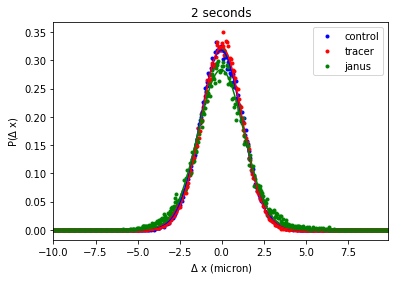

In [34]:
paramsc3,covmc3 = sco.curve_fit(gaussian,vh3nrx.index,vh3nrx.get_values())
yfitc3 = gaussian(vh3nrx.index,paramsc3[0],paramsc3[1],paramsc3[2])

paramst3,covmt3 = sco.curve_fit(gaussian,vh3hrx.index,vh3hrx.get_values())
yfitt3 = gaussian(vh3hrx.index,paramst3[0],paramst3[1],paramst3[2])

paramsj3,covmj3 = sco.curve_fit(gaussian,vh3hgx.index,vh3hgx.get_values())
yfitj3 = gaussian(vh3hgx.index,paramsj3[0],paramsj3[1],paramsj3[2])


vh3nrx.plot(style = 'b.',label = 'control')
vh3hrx.plot(style = 'r.',label = 'tracer')
vh3hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh3nrx.index,yfitc3,color='blue')
plt.plot(vh3hrx.index,yfitt3,color='red')
plt.plot(vh3hgx.index,yfitj3,color='green')
plt.yscale('linear')
plt.title('2 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')

Text(0.5,0,u'$\\Delta$ x (micron)')

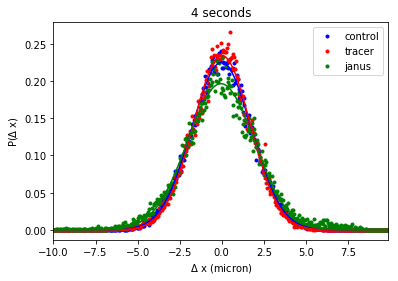

In [35]:
paramsc4,covmc4 = sco.curve_fit(gaussian,vh4nrx.index,vh4nrx.get_values())
yfitc4 = gaussian(vh4nrx.index,paramsc4[0],paramsc4[1],paramsc4[2])

paramst4,covmt4 = sco.curve_fit(gaussian,vh4hrx.index,vh4hrx.get_values())
yfitt4 = gaussian(vh4hrx.index,paramst4[0],paramst4[1],paramst4[2])

paramsj4,covmj4 = sco.curve_fit(gaussian,vh4hgx.index,vh4hgx.get_values())
yfitj4 = gaussian(vh4hgx.index,paramsj4[0],paramsj4[1],paramsj4[2])


vh4nrx.plot(style = 'b.',label = 'control')
vh4hrx.plot(style = 'r.',label = 'tracer')
vh4hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh4nrx.index,yfitc4,color='blue')
plt.plot(vh4hrx.index,yfitt4,color='red')
plt.plot(vh4hgx.index,yfitj4,color='green')
plt.yscale('linear')
plt.title('4 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')

Text(0.5,0,u'$\\Delta$ x (micron)')

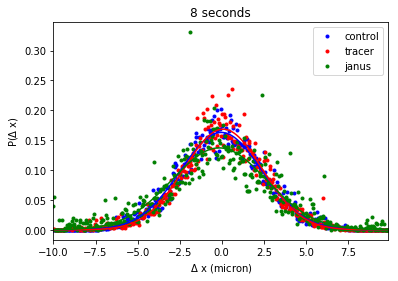

In [36]:
paramsc5,covmc5 = sco.curve_fit(gaussian,vh5nrx.index,vh5nrx.get_values())
yfitc5 = gaussian(vh5nrx.index,paramsc5[0],paramsc5[1],paramsc5[2])

paramst5,covmt5 = sco.curve_fit(gaussian,vh5hrx.index,vh5hrx.get_values())
yfitt5 = gaussian(vh5hrx.index,paramst5[0],paramst5[1],paramst5[2])

paramsj5,covmj5 = sco.curve_fit(gaussian,vh5hgx.index,vh5hgx.get_values())
yfitj5 = gaussian(vh5hgx.index,paramsj5[0],paramsj5[1],paramsj5[2])


vh5nrx.plot(style = 'b.',label = 'control')
vh5hrx.plot(style = 'r.',label = 'tracer')
vh5hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh5nrx.index,yfitc5,color='blue')
plt.plot(vh5hrx.index,yfitt5,color='red')
plt.plot(vh5hgx.index,yfitj5,color='green')
plt.yscale('linear')
plt.title('8 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')

Text(0.5,0,u'$\\Delta$ x (micron)')

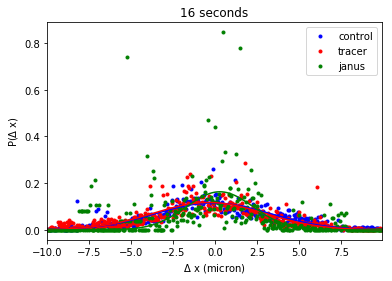

In [37]:
paramsc6,covmc6 = sco.curve_fit(gaussian,vh6nrx.index,vh6nrx.get_values())
yfitc6 = gaussian(vh6nrx.index,paramsc6[0],paramsc6[1],paramsc6[2])

paramst6,covmt6 = sco.curve_fit(gaussian,vh6hrx.index,vh6hrx.get_values())
yfitt6 = gaussian(vh6hrx.index,paramst6[0],paramst6[1],paramst6[2])

paramsj6,covmj6 = sco.curve_fit(gaussian,vh6hgx.index,vh6hgx.get_values())
yfitj6 = gaussian(vh5hgx.index,paramsj6[0],paramsj6[1],paramsj6[2])


vh6nrx.plot(style = 'b.',label = 'control')
vh6hrx.plot(style = 'r.',label = 'tracer')
vh6hgx.plot(style = 'g.',label = 'janus')
plt.plot(vh6nrx.index,yfitc6,color='blue')
plt.plot(vh6hrx.index,yfitt6,color='red')
plt.plot(vh6hgx.index,yfitj6,color='green')
plt.yscale('linear')
plt.title('16 seconds')
plt.legend()
plt.ylabel('P($\Delta$ x)')
plt.xlabel('$\Delta$ x (micron)')

(3e-05, 1)

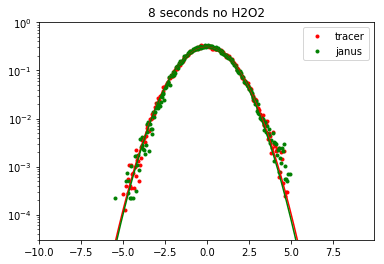

In [38]:
paramsst,covmst = sco.curve_fit(gaussian,vh3nrx.index,vh3nrx.get_values())
yfitst = gaussian(vh3nrx.index,paramsst[0],paramsst[1],paramsst[2])

paramssj,covmsj = sco.curve_fit(gaussian,vh3ngx.index,vh3ngx.get_values())
yfitsj = gaussian(vh3ngx.index,paramssj[0],paramssj[1],paramssj[2])




vh3nrx.plot(style = 'r.',label = 'tracer')
vh3ngx.plot(style = 'g.',label = 'janus')
plt.plot(vh3nrx.index,yfitst,color = 'red')
plt.plot(vh3ngx.index,yfitsj, color = 'green')
plt.yscale('log')
plt.legend()
plt.title('8 seconds no H2O2')
ylim(ymin=3e-5, ymax=1)

If there is some difference here it could possibly because of the dimers and trimers formed during the process of making the janus particles.

In [56]:
vh3hrxi = tp.motion.vanhove(poshrx, lagtime = 24, mpp = scaling,bins = binsequence, ensemble = False)

#vh3hrxi.sum()

particle
3.0       8.415013
7.0       8.415013
9.0       8.415013
10.0      8.415013
11.0      8.415013
15.0      8.415013
17.0      8.415013
19.0      8.415013
20.0      8.415013
23.0      8.415013
24.0      8.415013
27.0      8.415013
28.0      8.415013
29.0      8.415013
30.0      8.415013
33.0      8.415013
34.0      8.415013
35.0      8.415013
39.0      8.415013
41.0      8.415013
42.0      8.415013
48.0      8.415013
55.0      8.415013
59.0      8.415013
61.0      8.415013
64.0      8.415013
65.0      8.415013
67.0      8.415013
76.0      8.415013
81.0      8.415013
            ...   
5008.0    0.000000
5027.0    0.000000
5037.0    0.000000
5050.0    0.000000
5053.0    0.000000
5058.0    0.000000
5078.0    0.000000
5088.0    0.000000
5092.0    0.000000
5105.0    0.000000
5106.0    0.000000
5117.0    0.000000
5121.0    0.000000
5137.0    0.000000
5143.0    0.000000
5188.0    0.000000
5197.0    0.000000
5203.0    0.000000
5227.0    0.000000
5230.0    0.000000
5233.0    0.000000
523

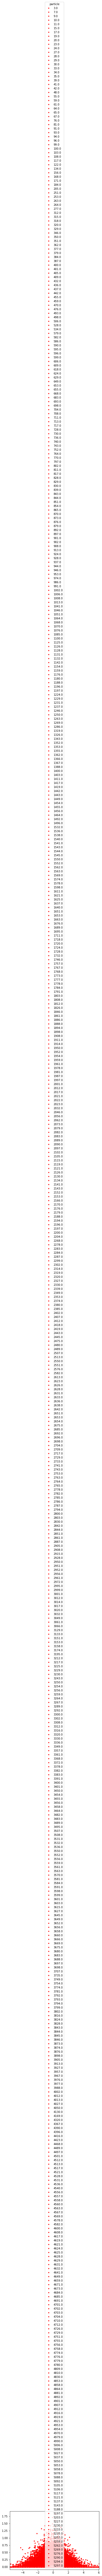

In [40]:



vh3hrxi.plot(style = 'r.',label = 'tracer')


Text(0.5,1,u'8 seconds no H2O2')

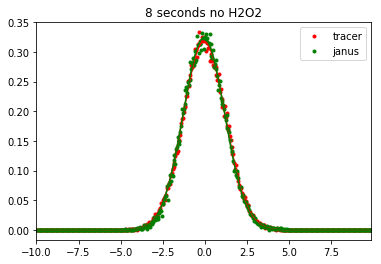

In [41]:
paramsst,covmst = sco.curve_fit(gaussian,vh3nrx.index,vh3nrx.get_values())
yfitst = gaussian(vh3nrx.index,paramsst[0],paramsst[1],paramsst[2])

paramssj,covmsj = sco.curve_fit(gaussian,vh3ngx.index,vh3ngx.get_values())
yfitsj = gaussian(vh3ngx.index,paramssj[0],paramssj[1],paramssj[2])




vh3nrx.plot(style = 'r.',label = 'tracer')
vh3ngx.plot(style = 'g.',label = 'janus')
plt.plot(vh3nrx.index,yfitst,color = 'red')
plt.plot(vh3ngx.index,yfitsj, color = 'green')
plt.yscale('linear')
plt.legend()
plt.title('8 seconds no H2O2')

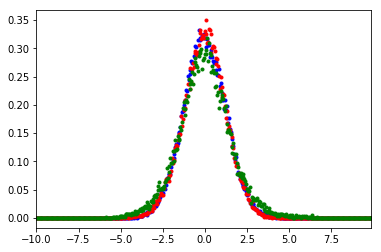

In [42]:
vh3nrx.plot(style = 'b.',label = 'control')
vh3hrx.plot(style = 'r.',label = 'tracer')
vh3hgx.plot(style = 'g.',label = 'janus')

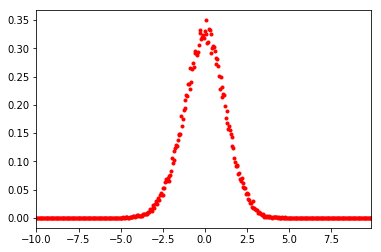

In [43]:
vh3hrx.plot(style = 'r.',label = 'tracer')

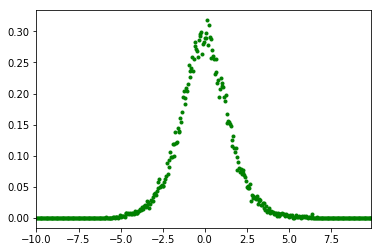

In [44]:
vh3hgx.plot(style = 'g.',label = 'janus')

pdf saved


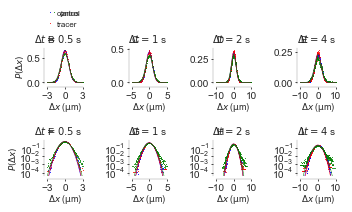

In [45]:
import seaborn as sns
sns.set(style='ticks')
sns.set_context('paper')
#sns.set_palette(sns.husl_palette(10,l=.55))

# 10pt font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 2 ,'ytick.major.size': 2,
                     'xtick.minor.size': 10 ,'ytick.minor.size': 10,
                     'axes.labelpad': 0})
plt.rcParams.update({'xtick.labelsize':10, 'ytick.labelsize':10})

myms = 2
mylw = .5
myymin = 4e-5


plt.subplot(2,4,1)
vh1nrx.plot(style = 'b.',label = 'control', ms=myms)
vh1hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh1hgx.plot(style = 'g.',label = 'janus', ms=myms)
axB = plt.gca()
plt.plot(vh1nrx.index,yfitc1,color='blue', linewidth=mylw)
plt.plot(vh1hrx.index,yfitt1,color='red', linewidth=mylw)
plt.plot(vh1hgx.index,yfitj1,color='green', linewidth=mylw)
plt.yscale('linear')
plt.title('B', loc='left')
plt.legend(bbox_to_anchor=(0., 1.5, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-3,3)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)
plt.xticks([-3,0, 3])


plt.subplot(2,4,2)
vh2nrx.plot(style = 'b.',label = 'control', ms=myms)
vh2hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh2hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh2nrx.index,yfitc2,color='blue', linewidth=mylw)
plt.plot(vh2hrx.index,yfitt2,color='red', linewidth=mylw)
plt.plot(vh2hgx.index,yfitj2,color='green', linewidth=mylw)
plt.yscale('linear')
plt.title('C', loc='left')
axC = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-5,5)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,3)
vh3nrx.plot(style = 'b.',label = 'control', ms=myms)
vh3hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh3hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh3nrx.index,yfitc3,color='blue', linewidth=mylw)
plt.plot(vh3hrx.index,yfitt3,color='red', linewidth=mylw)
plt.plot(vh3hgx.index,yfitj3,color='green', linewidth=mylw)
plt.yscale('linear')
#plt.title('2 seconds')
plt.title('D', loc='left')
axD = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,4)
vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh4nrx.index,yfitc4,color='blue', linewidth=mylw)
plt.plot(vh4hrx.index,yfitt4,color='red', linewidth=mylw)
plt.plot(vh4hgx.index,yfitj4,color='green', linewidth=mylw)
plt.yscale('linear')
#plt.title('4 seconds')
plt.title('E', loc='left')
axE = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,5)
vh1nrx.plot(style = 'b.',label = 'control', ms=myms)
vh1hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh1hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh1nrx.index,yfitc1,color='blue', linewidth=mylw)
plt.plot(vh1hrx.index,yfitt1,color='red', linewidth=mylw)
plt.plot(vh1hgx.index,yfitj1,color='green', linewidth=mylw)
plt.yscale('log')
plt.title('F', loc='left')
axF = plt.gca()
#plt.legend(bbox_to_anchor=(0., 1.5, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-3,3)
ylim(ymin=myymin,ymax=1)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])
plt.xticks([-3,0, 3])

plt.subplot(2,4,6)
vh2nrx.plot(style = 'b.',label = 'control', ms=myms)
vh2hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh2hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh2nrx.index,yfitc2,color='blue', linewidth=mylw)
plt.plot(vh2hrx.index,yfitt2,color='red', linewidth=mylw)
plt.plot(vh2hgx.index,yfitj2,color='green', linewidth=mylw)
plt.yscale('log')
plt.title('G', loc='left')
axG = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-5,5)
ylim(ymin=myymin,ymax=1)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])

plt.subplot(2,4,7)
vh3nrx.plot(style = 'b.',label = 'control', ms=myms)
vh3hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh3hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh3nrx.index,yfitc3,color='blue', linewidth=mylw)
plt.plot(vh3hrx.index,yfitt3,color='red', linewidth=mylw)
plt.plot(vh3hgx.index,yfitj3,color='green', linewidth=mylw)
plt.yscale('log')
ylim(ymin=myymin,ymax=1)
#plt.title('2 seconds')
plt.title('H', loc='left')
axH = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])

plt.subplot(2,4,8)
vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh4nrx.index,yfitc4,color='blue', linewidth=mylw)
plt.plot(vh4hrx.index,yfitt4,color='red', linewidth=mylw)
plt.plot(vh4hgx.index,yfitj4,color='green', linewidth=mylw)
plt.yscale('log')
ylim(ymin=myymin,ymax=1)
#plt.title('4 seconds')
plt.title('I', loc='left')
axI = plt.gca()
xlim(-10,10)
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])




fig = plt.gcf()

thisheight=2.7
thiswidth=5
fig.set_figheight(thisheight)
fig.set_figwidth(thiswidth)

plt.rcParams.update({'axes.titlesize' : 10 })
axB.set_title('$\Delta{}t = 0.5$ s', loc='right')
axC.set_title('$\Delta{}t = 1$ s', loc='right')
axD.set_title('$\Delta{}t = 2$ s', loc='right')
axE.set_title('$\Delta{}t = 4$ s', loc='right')
axF.set_title('$\Delta{}t = 0.5$ s', loc='right')
axG.set_title('$\Delta{}t = 1$ s', loc='right')
axH.set_title('$\Delta{}t = 2$ s', loc='right')
axI.set_title('$\Delta{}t = 4$ s', loc='right')

#axB.tick_params(which='minor', left=True, axis='y')
#axF.tick_params(which='minor', left=True, axis='y')
axG.tick_params(which='minor', left=True, axis='y')


sns.despine(offset=3, trim=False);
                                   
plt.tight_layout()

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('vanhove,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    plt.savefig('vanhove,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('vanhove,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

pdf saved


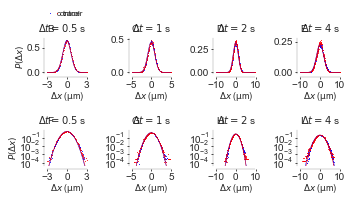

In [46]:
import seaborn as sns
sns.set(style='ticks')
sns.set_context('paper')
#sns.set_palette(sns.husl_palette(10,l=.55))

# 10pt font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 2 ,'ytick.major.size': 2,
                     'xtick.minor.size': 1.5 ,'ytick.minor.size': 1.5,
                     'xtick.labelsize':10, 'ytick.labelsize':10,
                     'axes.labelpad': 0})

myms = 2
mylw = .5
myymin = 4e-5


plt.subplot(2,4,1)
vh1nrx.plot(style = 'b.',label = 'control', ms=myms)
vh1hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh1hgx.plot(style = 'g.',label = 'janus', ms=myms)
axB = plt.gca()
plt.plot(vh1nrx.index,yfitc1,color='blue', linewidth=mylw)
plt.plot(vh1hrx.index,yfitt1,color='red', linewidth=mylw)
#plt.plot(vh1hgx.index,yfitj1,color='green', linewidth=mylw)
plt.yscale('linear')
plt.title('B', loc='left')
plt.legend(bbox_to_anchor=(0., 1.5, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-3,3)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)
plt.xticks([-3,0, 3])


plt.subplot(2,4,2)
vh2nrx.plot(style = 'b.',label = 'control', ms=myms)
vh2hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh2hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh2nrx.index,yfitc2,color='blue', linewidth=mylw)
plt.plot(vh2hrx.index,yfitt2,color='red', linewidth=mylw)
#plt.plot(vh2hgx.index,yfitj2,color='green', linewidth=mylw)
plt.yscale('linear')
plt.title('C', loc='left')
axC = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-5,5)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,3)
vh3nrx.plot(style = 'b.',label = 'control', ms=myms)
vh3hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh3hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh3nrx.index,yfitc3,color='blue', linewidth=mylw)
plt.plot(vh3hrx.index,yfitt3,color='red', linewidth=mylw)
#plt.plot(vh3hgx.index,yfitj3,color='green', linewidth=mylw)
plt.yscale('linear')
#plt.title('2 seconds')
plt.title('D', loc='left')
axD = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,4)
vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh4nrx.index,yfitc4,color='blue', linewidth=mylw)
plt.plot(vh4hrx.index,yfitt4,color='red', linewidth=mylw)
#plt.plot(vh4hgx.index,yfitj4,color='green', linewidth=mylw)
plt.yscale('linear')
#plt.title('4 seconds')
plt.title('E', loc='left')
axE = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,5)
vh1nrx.plot(style = 'b.',label = 'control', ms=myms)
vh1hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh1hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh1nrx.index,yfitc1,color='blue', linewidth=mylw)
plt.plot(vh1hrx.index,yfitt1,color='red', linewidth=mylw)
#plt.plot(vh1hgx.index,yfitj1,color='green', linewidth=mylw)
plt.yscale('log')
plt.title('F', loc='left')
axF = plt.gca()
#plt.legend(bbox_to_anchor=(0., 1.5, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-3,3)
ylim(ymin=myymin,ymax=1)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])
plt.xticks([-3,0, 3])

plt.subplot(2,4,6)
vh2nrx.plot(style = 'b.',label = 'control', ms=myms)
vh2hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh2hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh2nrx.index,yfitc2,color='blue', linewidth=mylw)
plt.plot(vh2hrx.index,yfitt2,color='red', linewidth=mylw)
#plt.plot(vh2hgx.index,yfitj2,color='green', linewidth=mylw)
plt.yscale('log')
plt.title('G', loc='left')
axG = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-5,5)
ylim(ymin=myymin,ymax=1)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])

plt.subplot(2,4,7)
vh3nrx.plot(style = 'b.',label = 'control', ms=myms)
vh3hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh3hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh3nrx.index,yfitc3,color='blue', linewidth=mylw)
plt.plot(vh3hrx.index,yfitt3,color='red', linewidth=mylw)
#plt.plot(vh3hgx.index,yfitj3,color='green', linewidth=mylw)
plt.yscale('log')
ylim(ymin=myymin,ymax=1)
#plt.title('2 seconds')
plt.title('H', loc='left')
axH = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])

plt.subplot(2,4,8)
vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh4nrx.index,yfitc4,color='blue', linewidth=mylw)
plt.plot(vh4hrx.index,yfitt4,color='red', linewidth=mylw)
#plt.plot(vh4hgx.index,yfitj4,color='green', linewidth=mylw)
plt.yscale('log')
ylim(ymin=myymin,ymax=1)
#plt.title('4 seconds')
plt.title('I', loc='left')
axI = plt.gca()
xlim(-10,10)
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])




fig = plt.gcf()

thisheight=2.7
thiswidth=5
fig.set_figheight(thisheight)
fig.set_figwidth(thiswidth)

plt.rcParams.update({'axes.titlesize' : 10 })
axB.set_title('$\Delta{}t = 0.5$ s', loc='right')
axC.set_title('$\Delta{}t = 1$ s', loc='right')
axD.set_title('$\Delta{}t = 2$ s', loc='right')
axE.set_title('$\Delta{}t = 4$ s', loc='right')
axF.set_title('$\Delta{}t = 0.5$ s', loc='right')
axG.set_title('$\Delta{}t = 1$ s', loc='right')
axH.set_title('$\Delta{}t = 2$ s', loc='right')
axI.set_title('$\Delta{}t = 4$ s', loc='right')

#axB.tick_params(which='minor', left=True, axis='y')
#axF.tick_params(which='minor', left=True, axis='y')
axG.tick_params(which='minor', left=True, axis='y')


sns.despine(offset=3, trim=False);
                                   
plt.tight_layout()

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('vanhove,tracer,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    plt.savefig('vanhove,tracer,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('vanhove,tracer,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

pdf saved


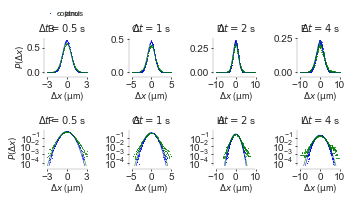

In [47]:
import seaborn as sns
sns.set(style='ticks')
sns.set_context('paper')
#sns.set_palette(sns.husl_palette(10,l=.55))

# 10pt font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 2 ,'ytick.major.size': 2,
                     'xtick.minor.size': 1.5 ,'ytick.minor.size': 1.5,
                     'xtick.labelsize':10, 'ytick.labelsize':10,
                     'axes.labelpad': 0})

myms = 2
mylw = .5
myymin = 4e-5


plt.subplot(2,4,1)
vh1nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh1hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh1hgx.plot(style = 'g.',label = 'janus', ms=myms)
axB = plt.gca()
plt.plot(vh1nrx.index,yfitc1,color='blue', linewidth=mylw)
#plt.plot(vh1hrx.index,yfitt1,color='red', linewidth=mylw)
plt.plot(vh1hgx.index,yfitj1,color='green', linewidth=mylw)
plt.yscale('linear')
plt.title('B', loc='left')
plt.legend(bbox_to_anchor=(0., 1.5, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-3,3)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)
plt.xticks([-3,0, 3])


plt.subplot(2,4,2)
vh2nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh2hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh2hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh2nrx.index,yfitc2,color='blue', linewidth=mylw)
#plt.plot(vh2hrx.index,yfitt2,color='red', linewidth=mylw)
plt.plot(vh2hgx.index,yfitj2,color='green', linewidth=mylw)
plt.yscale('linear')
plt.title('C', loc='left')
axC = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-5,5)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,3)
vh3nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh3hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh3hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh3nrx.index,yfitc3,color='blue', linewidth=mylw)
#plt.plot(vh3hrx.index,yfitt3,color='red', linewidth=mylw)
plt.plot(vh3hgx.index,yfitj3,color='green', linewidth=mylw)
plt.yscale('linear')
#plt.title('2 seconds')
plt.title('D', loc='left')
axD = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,4)
vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh4nrx.index,yfitc4,color='blue', linewidth=mylw)
#plt.plot(vh4hrx.index,yfitt4,color='red', linewidth=mylw)
plt.plot(vh4hgx.index,yfitj4,color='green', linewidth=mylw)
plt.yscale('linear')
#plt.title('4 seconds')
plt.title('E', loc='left')
axE = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
#ylim(ymin=0)

plt.subplot(2,4,5)
vh1nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh1hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh1hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh1nrx.index,yfitc1,color='blue', linewidth=mylw)
#plt.plot(vh1hrx.index,yfitt1,color='red', linewidth=mylw)
plt.plot(vh1hgx.index,yfitj1,color='green', linewidth=mylw)
plt.yscale('log')
plt.title('F', loc='left')
axF = plt.gca()
#plt.legend(bbox_to_anchor=(0., 1.5, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-3,3)
ylim(ymin=myymin,ymax=1)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])
plt.xticks([-3,0, 3])

plt.subplot(2,4,6)
vh2nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh2hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh2hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh2nrx.index,yfitc2,color='blue', linewidth=mylw)
#plt.plot(vh2hrx.index,yfitt2,color='red', linewidth=mylw)
plt.plot(vh2hgx.index,yfitj2,color='green', linewidth=mylw)
plt.yscale('log')
plt.title('G', loc='left')
axG = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
xlim(-5,5)
ylim(ymin=myymin,ymax=1)
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])

plt.subplot(2,4,7)
vh3nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh3hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh3hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh3nrx.index,yfitc3,color='blue', linewidth=mylw)
#plt.plot(vh3hrx.index,yfitt3,color='red', linewidth=mylw)
plt.plot(vh3hgx.index,yfitj3,color='green', linewidth=mylw)
plt.yscale('log')
ylim(ymin=myymin,ymax=1)
#plt.title('2 seconds')
plt.title('H', loc='left')
axH = plt.gca()
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])

plt.subplot(2,4,8)
vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)
plt.plot(vh4nrx.index,yfitc4,color='blue', linewidth=mylw)
#plt.plot(vh4hrx.index,yfitt4,color='red', linewidth=mylw)
plt.plot(vh4hgx.index,yfitj4,color='green', linewidth=mylw)
plt.yscale('log')
ylim(ymin=myymin,ymax=1)
#plt.title('4 seconds')
plt.title('I', loc='left')
axI = plt.gca()
xlim(-10,10)
#plt.legend()
#plt.ylabel('$P(\Delta{}x)$')
plt.xlabel('$\Delta{}x$ ($\mathrm{\mu}$m)')
tick_params(which='both', pad=3)
tick_params( which='both', pad=2)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1])




fig = plt.gcf()

thisheight=2.7
thiswidth=5
fig.set_figheight(thisheight)
fig.set_figwidth(thiswidth)

plt.rcParams.update({'axes.titlesize' : 10 })
axB.set_title('$\Delta{}t = 0.5$ s', loc='right')
axC.set_title('$\Delta{}t = 1$ s', loc='right')
axD.set_title('$\Delta{}t = 2$ s', loc='right')
axE.set_title('$\Delta{}t = 4$ s', loc='right')
axF.set_title('$\Delta{}t = 0.5$ s', loc='right')
axG.set_title('$\Delta{}t = 1$ s', loc='right')
axH.set_title('$\Delta{}t = 2$ s', loc='right')
axI.set_title('$\Delta{}t = 4$ s', loc='right')

#axB.tick_params(which='minor', left=True, axis='y')
#axF.tick_params(which='minor', left=True, axis='y')
axG.tick_params(which='minor', left=True, axis='y')


sns.despine(offset=3, trim=False);
                                   
plt.tight_layout()

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('vanhove,janus,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    plt.savefig('vanhove,janus,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('vanhove,janus,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

In [48]:
#vh4nrx.plot(style = 'b.',label = 'control', ms=myms)
#vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
#vh4hgx.plot(style = 'g.',label = 'janus', ms=myms)

# control
vh4nrx.sum()*binwidth

1.0000000000000002

In [49]:
# janus
vh4hgx.sum()*binwidth

0.9999999999999991

1.0000000000000002

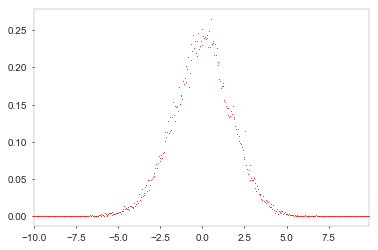

In [50]:
# tracer
vh4hrx.plot(style = 'r.',label = 'tracer', ms=myms)
vh4hrx.sum()*binwidth

In [51]:
areaundervh4hrx = vh4hrx.sum()*binwidth

In [52]:
normfactorvh4hrx = 1/areaundervh4hrx
normfactorvh4hrx

0.9999999999999998

In [53]:
vh4hrxnormed = (1/(vh4hrx.sum()*binwidth))*vh4hrx

In [54]:
vh4hrxnormed.sum()*binwidth

1.0

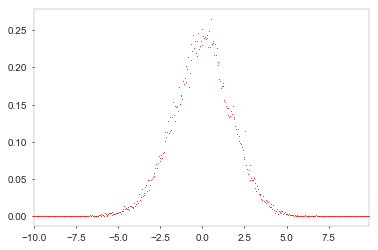

In [55]:
vh4hrxnormed.plot(style = 'r.',label = 'tracer', ms=myms)